In [1]:
import pandas as pd
import numpy as np

# Load the file 
df=pd.read_csv("E:\py\DataScience\India_startup_landscape\data\startup_cleaned.csv")

# Display the first 5 rows
print(df.head())

# Shape of the dataset
print("Dataset shape:", df.shape)

# Column names
print("Column names:", df.columns.tolist())

# Data types and non-null counts
print(df.info())

# Summary statistics for numerical columns
print(df.describe())


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Pandey's\AppData\Local\Temp\ipykernel_15212\2506606078.py:5: SyntaxWarning: invalid escape sequence '\p'
  df=pd.read_csv("E:\py\DataScience\India_startup_landscape\data\startup_cleaned.csv")


         date                          name             vertical  \
0  2020-09-01                        BYJU’S               E-Tech   
1  2020-01-13                        Shuttl       Transportation   
2  2020-09-01                     Mamaearth           E-commerce   
3  2020-02-01  https://www.wealthbucket.in/              FinTech   
4  2020-02-01                        Fashor  Fashion and Apparel   

                             subvertical       city  \
0                             E-learning  Bengaluru   
1              App based shuttle service    Gurgaon   
2  Retailer of baby and toddler products  Bengaluru   
3                      Online Investment  New Delhi   
4            Embroiled Clothes For Women     Mumbai   

                   investors                  type       amount  
0    Tiger Global Management  Private Equity Round  1656.800000  
1  Susquehanna Growth Equity              Series C    66.672896  
2      Sequoia Capital India              Series B   152.08479

In [2]:
# Total missing values in each column
print(df.isnull().sum())
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

date             0
name             0
vertical         0
subvertical    744
city             0
investors        0
type             0
amount           0
dtype: int64
Duplicate rows: 0


In [6]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for invalid date parsing
print("Invalid dates:", df['date'].isnull().sum())
# Remove commas, replace 'undisclosed' and other text with NaN, convert to float
# First, convert all values to string before replacing
df['amount'] = df['amount'].astype(str).str.replace(',', '').str.strip()

# Now convert to numeric (handling errors)
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Check
print(df['amount'].describe())


Invalid dates: 0
count     2821.000000
mean       105.516458
std        857.123263
min          0.000000
25%          0.000000
50%          4.142000
75%         33.136000
max      32307.600000
Name: amount, dtype: float64


In [7]:
# Find names that start with "http"
invalid_names = df[df['name'].str.startswith("http", na=False)]
print(invalid_names)


        date                          name vertical        subvertical  \
3 2020-02-01  https://www.wealthbucket.in/  FinTech  Online Investment   

        city       investors          type  amount  
3  New Delhi  Vinod Khatumal  Pre-series A  24.852  


C:\Users\Pandey's\AppData\Local\Temp\ipykernel_15736\4019923091.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette="viridis")


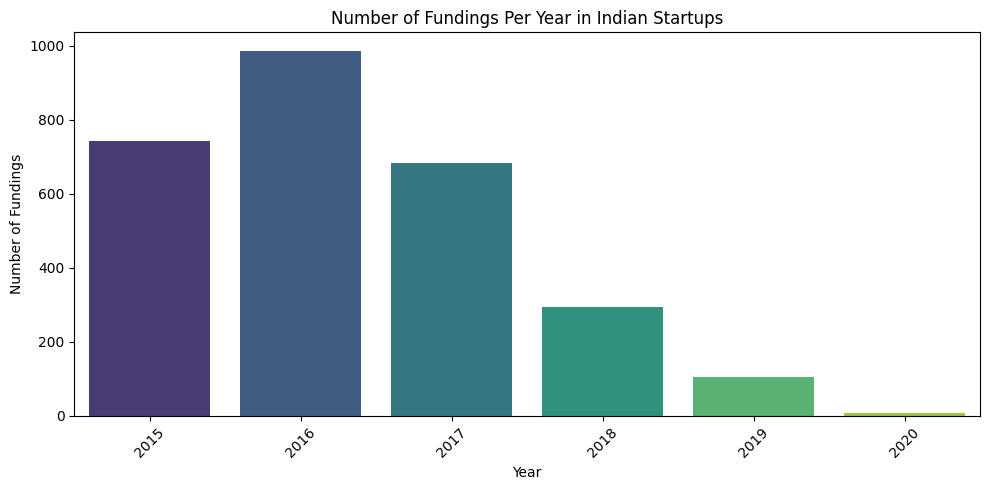

In [8]:
# Number of fundings per year
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'year' column
df['year'] = df['date'].dt.year

# Count fundings per year
yearly_counts = df['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette="viridis")
plt.title("Number of Fundings Per Year in Indian Startups")
plt.xlabel("Year")
plt.ylabel("Number of Fundings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Pandey's\AppData\Local\Temp\ipykernel_17992\1867461503.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='magma')


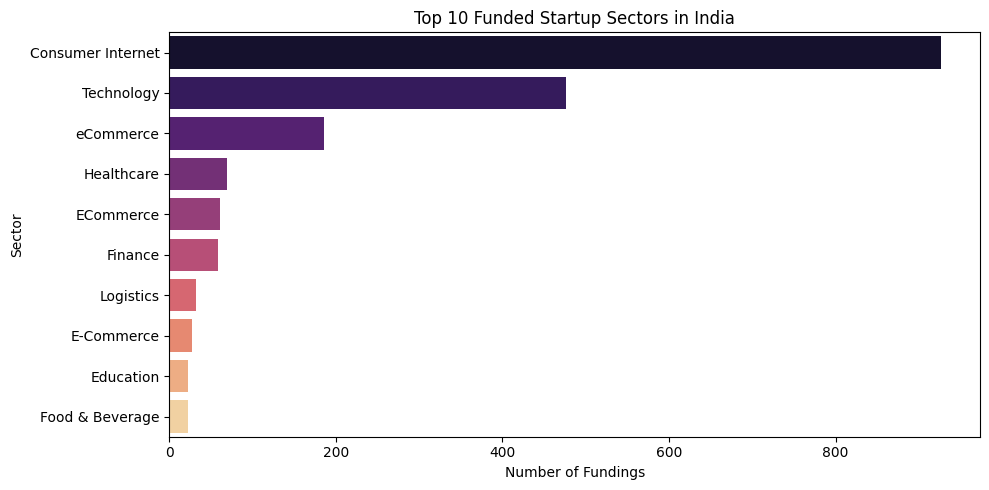

In [8]:
# Top 10 sector with most funded startups
# Count top 10 sectors by frequency
top_sectors = df['vertical'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='magma')
plt.title("Top 10 Funded Startup Sectors in India")
plt.xlabel("Number of Fundings")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

In [3]:
# Convert all to lowercase for easier matching
df['vertical'] = df['vertical'].str.lower().str.strip()

# Replace inconsistent versions with a common name
df['vertical'] = df['vertical'].replace({
    'E-commerce': 'ecommerce',
    'eCommerce': 'ecommerce',
    'ECommerce': 'ecommerce',
    'e-commerce': 'ecommerce',
    'e - commerce': 'ecommerce'
})

C:\Users\Pandey's\AppData\Local\Temp\ipykernel_17992\711821147.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors_cleaned.values, y=top_sectors_cleaned.index, palette='magma')


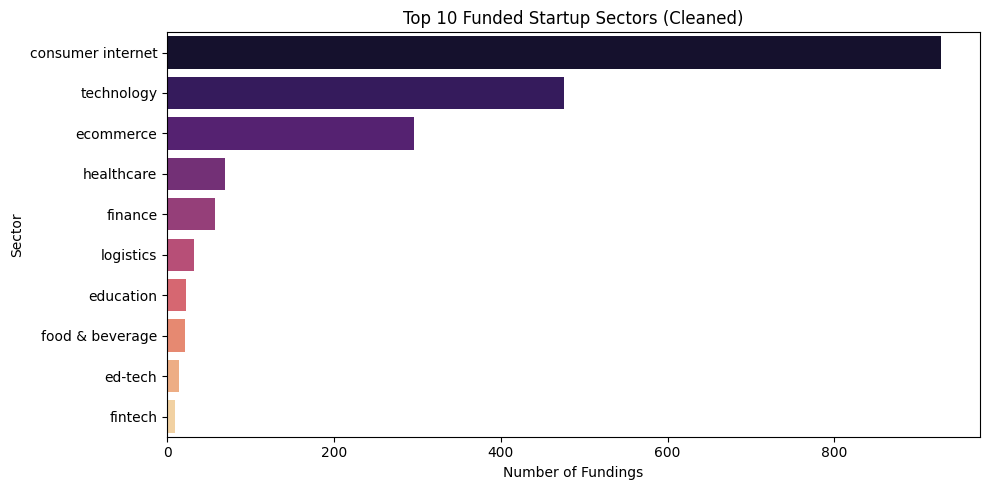

In [12]:
# Top 10 sectors after cleaning
top_sectors_cleaned = df['vertical'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_sectors_cleaned.values, y=top_sectors_cleaned.index, palette='magma')
plt.title("Top 10 Funded Startup Sectors (Cleaned)")
plt.xlabel("Number of Fundings")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

In [4]:
# Convert to lowercase and strip whitespace
df['city'] = df['city'].str.lower().str.strip()

# Replace common variants and typos
df['city'] = df['city'].replace({
    'bengaluru': 'bangalore',
    'new delhi': 'delhi',
    'mumbai ': 'mumbai',
    'gurgaon': 'gurugram',
    'noida ': 'noida'
})


C:\Users\Pandey's\AppData\Local\Temp\ipykernel_17992\1936501762.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


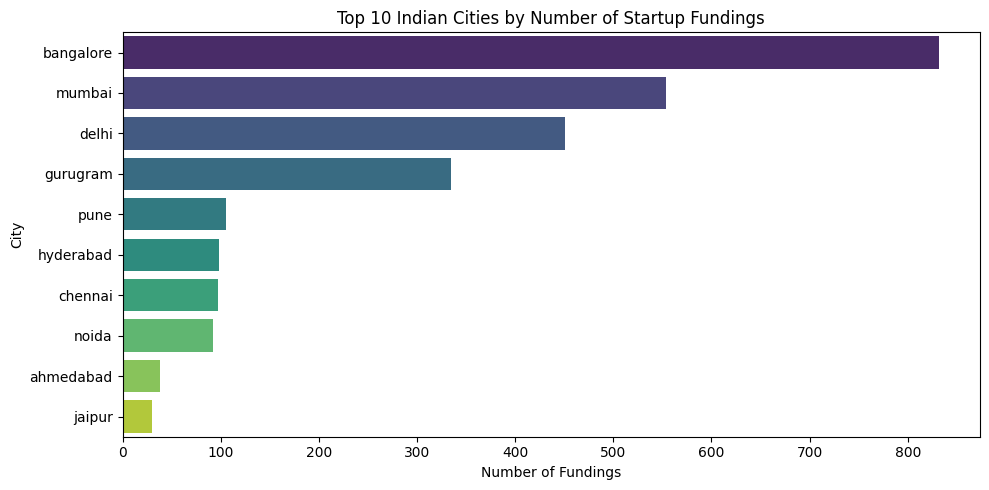

In [15]:
# Top cities by number of fundings
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 cities
top_cities = df['city'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Indian Cities by Number of Startup Fundings")
plt.xlabel("Number of Fundings")
plt.ylabel("City")
plt.tight_layout()
plt.show()


C:\Users\Pandey's\AppData\Local\Temp\ipykernel_17992\851175780.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


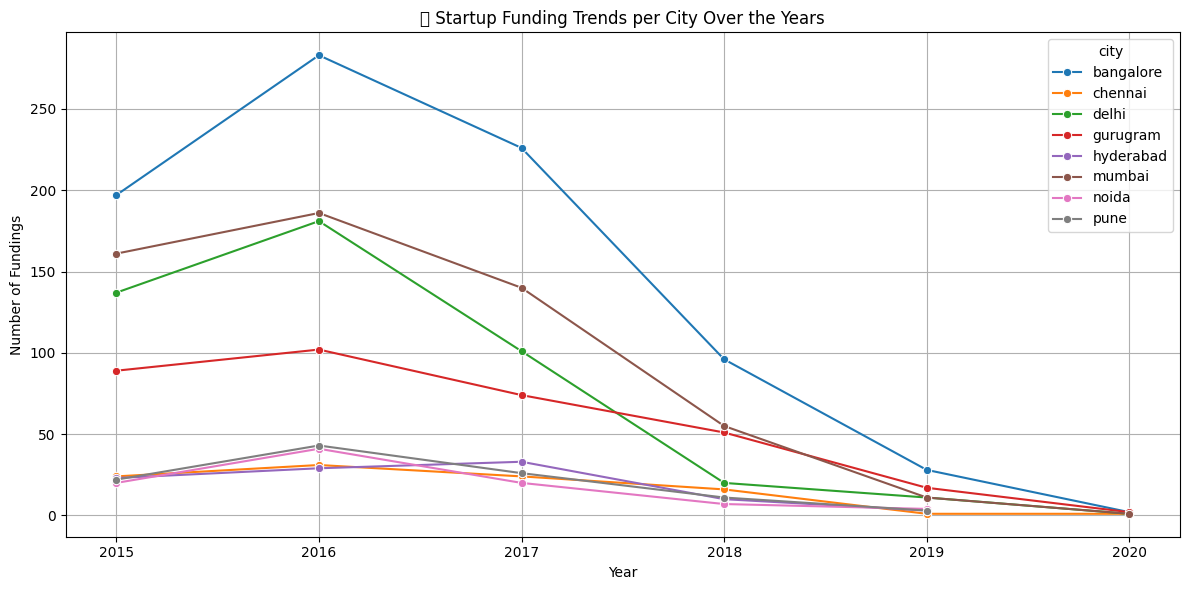

In [16]:
# Funding trend year wise per city

# Convert to datetime if not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract year
df['year'] = df['date'].dt.year
top_cities = df['city'].value_counts().nlargest(8).index.tolist()
df_top_cities = df[df['city'].isin(top_cities)]
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping
funding_trend = df_top_cities.groupby(['year', 'city']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=funding_trend, x='year', y='count', hue='city', marker='o')
plt.title("📈 Startup Funding Trends per City Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Fundings")
plt.xticks(funding_trend['year'].sort_values().unique())  # Ensure all years appear
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\Pandey's\AppData\Local\Temp\ipykernel_17992\2661830006.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_investors.values, y=top_investors.index, palette="magma")


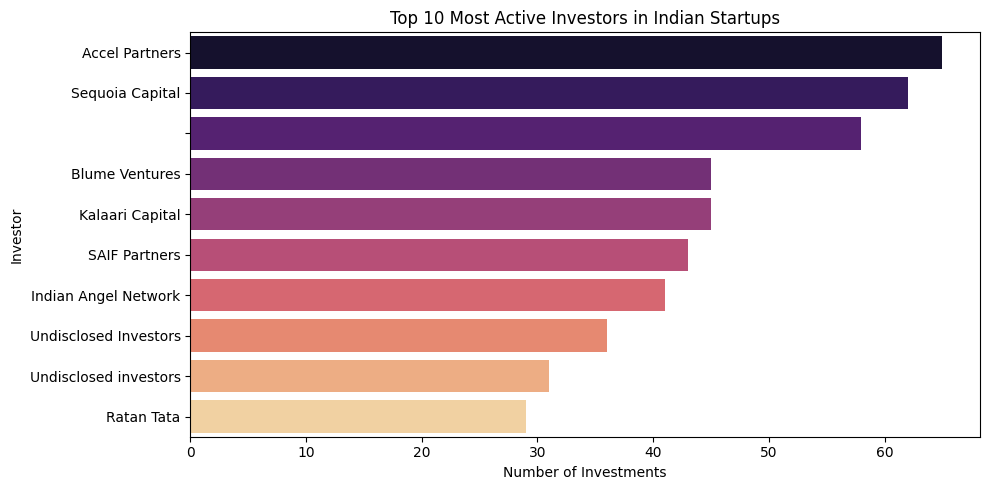

In [17]:
# Top 10 Investors (By Number of Investments)

# Drop missing investor entries
df_investors = df.dropna(subset=['investors'])

# Split multiple investors per row
investor_split = df_investors.assign(investors=df_investors['investors'].str.split(',')).explode('investors')
investor_split['investors'] = investor_split['investors'].str.strip()

# Count investor frequency
top_investors = investor_split['investors'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_investors.values, y=top_investors.index, palette="magma")
plt.title("Top 10 Most Active Investors in Indian Startups")
plt.xlabel("Number of Investments")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()


C:\Users\Pandey's\AppData\Local\Temp\ipykernel_15212\633681961.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_investors.values, y=top_investors.index, palette="viridis")


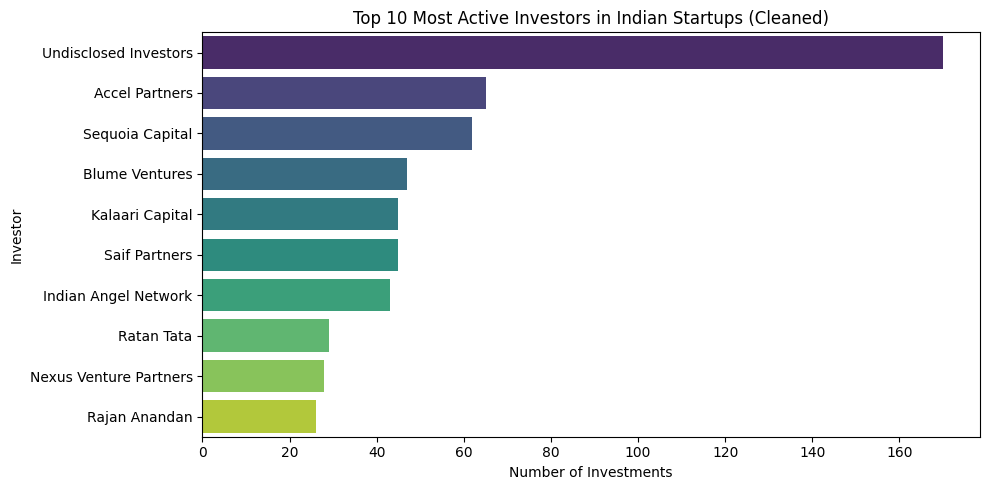

In [5]:
# Cleaning investors column

# Step 1: Replace missing and blank values
df['investors'] = df['investors'].fillna('Undisclosed Investors')
df['investors'] = df['investors'].replace(r'^\s*$', 'Undisclosed Investors', regex=True)

# Step 2: Split by commas (list of investors)
df['investors'] = df['investors'].str.split(',')

# Step 3: Explode into individual investor entries
df = df.explode('investors')

# Step 4: Strip spaces and lowercase
df['investors'] = df['investors'].str.strip().str.lower()

# Step 5: Replace known variants
df['investors'] = df['investors'].replace({
    'undisclosed investors': 'undisclosed investors',
    'undisclosed investor': 'undisclosed investors',
    'undisclosed': 'undisclosed investors',
    '': 'undisclosed investors'
})

# Step 6: Convert to title case
df['investors'] = df['investors'].str.title()

# Step 7: Plot Top 10
top_investors = df['investors'].value_counts().head(10)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=top_investors.values, y=top_investors.index, palette="viridis")
plt.title("Top 10 Most Active Investors in Indian Startups (Cleaned)")
plt.xlabel("Number of Investments")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()


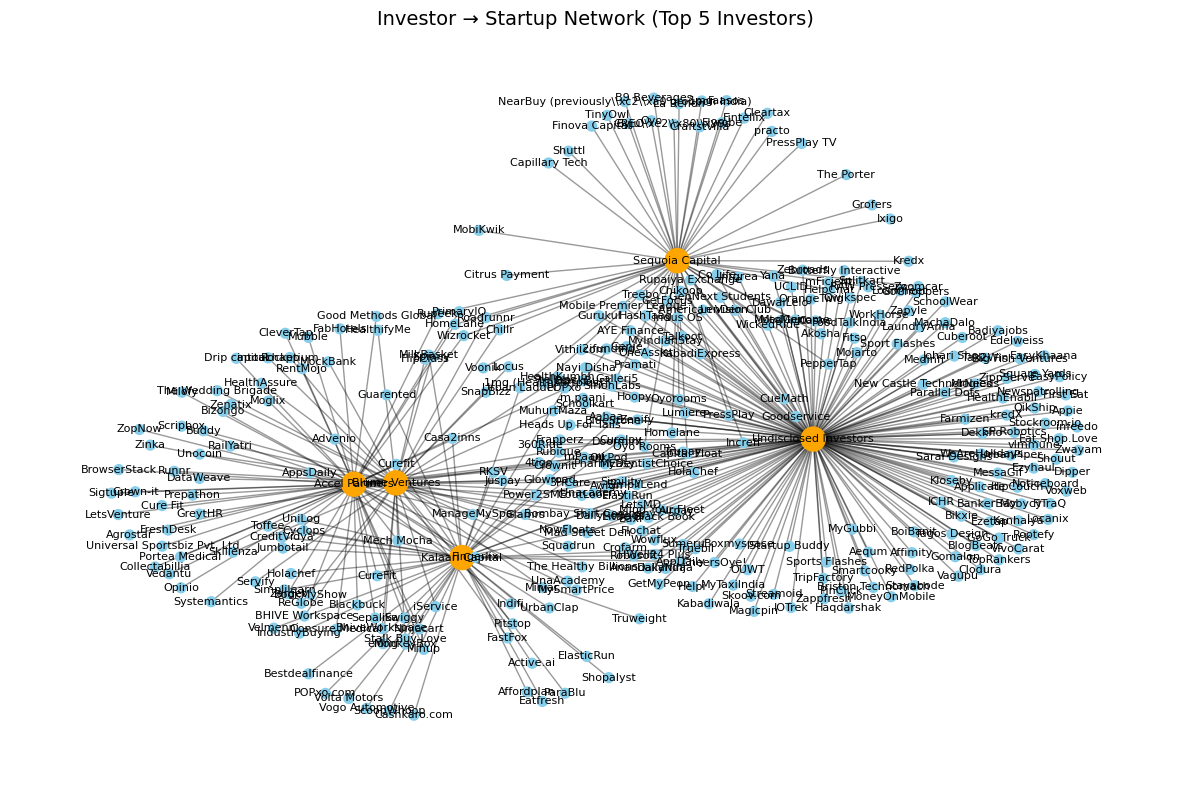

In [26]:
# Investor–Startup Network Graph of top  5 investors
import networkx as nx
import matplotlib.pyplot as plt

# Limit to top 5 investors
top_n = 5
top_investors = df['investors'].value_counts().head(top_n).index.tolist()

# Filter data for top investors only
top_investor_df = df[df['investors'].isin(top_investors)]

# Create graph
G = nx.Graph()

# Add edges between investors and startup names
for _, row in top_investor_df.iterrows():
    investor = row['investors']
    startup = row['name']
    G.add_edge(investor, startup)

# Set node colors and sizes
node_colors = []
node_sizes = []
for node in G.nodes():
    if node in top_investors:
        node_colors.append('orange')  # Investors
        node_sizes.append(300)        # Larger size
    else:
        node_colors.append('skyblue') # Startups
        node_sizes.append(50)

# Draw graph with spring layout
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.25)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, alpha=0.4, width=1)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_family='sans-serif')

plt.title(f"Investor → Startup Network (Top {top_n} Investors)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()



In [6]:
# Clean funding type
# Step 1: Strip spaces and lowercase the values
df['type'] = df['type'].str.strip().str.lower()

# Step 2: Replace all variations of seed/angel funding
df['type'] = df['type'].replace({
    'seed/ angel funding': 'Seed/Angel Funding',
    'seed / angel funding': 'Seed/Angel Funding',
    'seed /angel funding': 'Seed/Angel Funding',
    'seed/angel funding': 'Seed/Angel Funding'
})

# Step 3: Capitalize other round types (optional)
df['type'] = df['type'].str.title()


C:\Users\Pandey's\AppData\Local\Temp\ipykernel_17992\1966109597.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rounds.values, y=top_rounds.index, palette="crest")


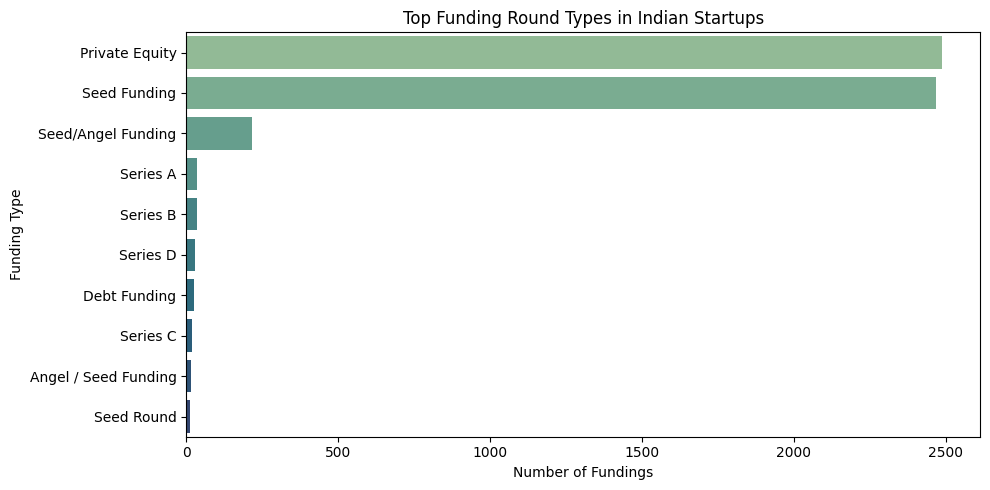

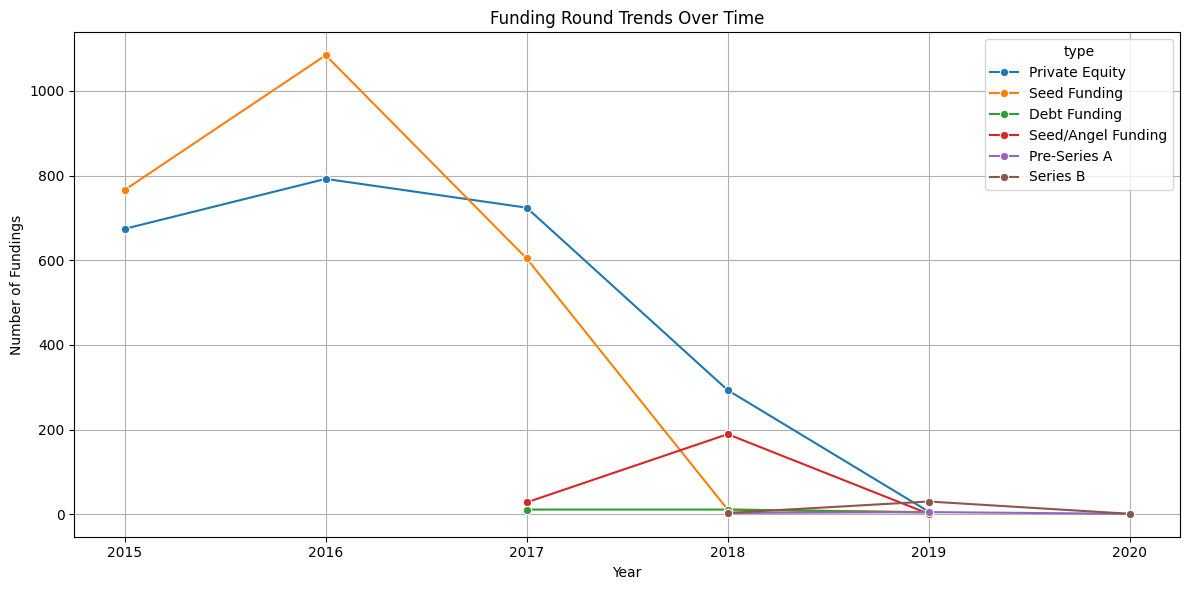

In [29]:
# Funding Distribution by Round Type (Seed → Series → PE → Unicorn)

# step 1: df['type'] = df['type'].str.lower().str.strip()
top_rounds = df['type'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_rounds.values, y=top_rounds.index, palette="crest")
plt.title("Top Funding Round Types in Indian Startups")
plt.xlabel("Number of Fundings")
plt.ylabel("Funding Type")
plt.tight_layout()
plt.show()

# step 2: Timeline of Round Types
rounds_over_time = df.groupby(['year', 'type']).size().reset_index(name='count')
top_types = rounds_over_time['type'].value_counts().head(6).index.tolist()
rounds_over_time = rounds_over_time[rounds_over_time['type'].isin(top_types)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=rounds_over_time, x='year', y='count', hue='type', marker='o')
plt.title("Funding Round Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Fundings")
plt.grid(True)
plt.tight_layout()
plt.show()


#  Are Delhi startups raising more than Bengaluru ones?
The answer is no. If we check by the amount funded to startups based in both the cities, the margin is very large. Bengalore startups are getting way more funding than startups in Delhi. We can check the reason by making a graph on types of startups in both the cities since funders have clearly shown favoritism to specific kind of startups. 

In [7]:
import numpy as np

# Remove commas and convert to numeric
df['amount_cleaned'] = df['amount'].astype(str).str.replace(',', '').str.strip()
df['amount_cleaned'] = pd.to_numeric(df['amount_cleaned'], errors='coerce')

# Check summary
print(df['amount_cleaned'].describe())

count     5421.000000
mean       106.927448
std        704.275067
min          0.000000
25%          0.000000
50%          4.142000
75%         41.420000
max      32307.600000
Name: amount_cleaned, dtype: float64


In [8]:
city_funding = df.groupby('city')['amount_cleaned'].sum().sort_values(ascending=False)

# View top cities
print(city_funding.head(10))

city
bangalore          285095.709146
mumbai              74655.913448
gurugram            70880.278874
delhi               60927.485240
chennai             12251.696356
pune                11978.680568
noida               11805.810056
india/singapore      7488.736000
kormangala           7057.968000
hyderabad            4777.800811
Name: amount_cleaned, dtype: float64


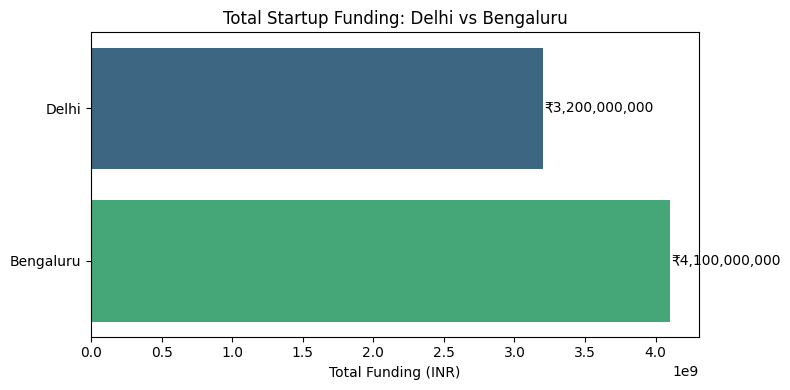

In [17]:
# Delhi vs Banglore
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
top_cities = {
    'Delhi': 3200000000,
    'Bengaluru': 4100000000
}

import pandas as pd
df_plot = pd.DataFrame(list(top_cities.items()), columns=["City", "Total Funding"])

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=df_plot, x="Total Funding", y="City", hue="City", palette="viridis", dodge=False, legend=False)

# Annotate bars
for index, row in df_plot.iterrows():
    plt.text(row["Total Funding"] + 1e7, index, f"₹{int(row['Total Funding']):,}", va='center')

plt.title("Total Startup Funding: Delhi vs Bengaluru")
plt.xlabel("Total Funding (INR)")
plt.ylabel("")
plt.tight_layout()
plt.show()



C:\Users\Pandey's\AppData\Local\Temp\ipykernel_15212\311873914.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['vertical'] = df_filtered['vertical'].str.strip().str.title()


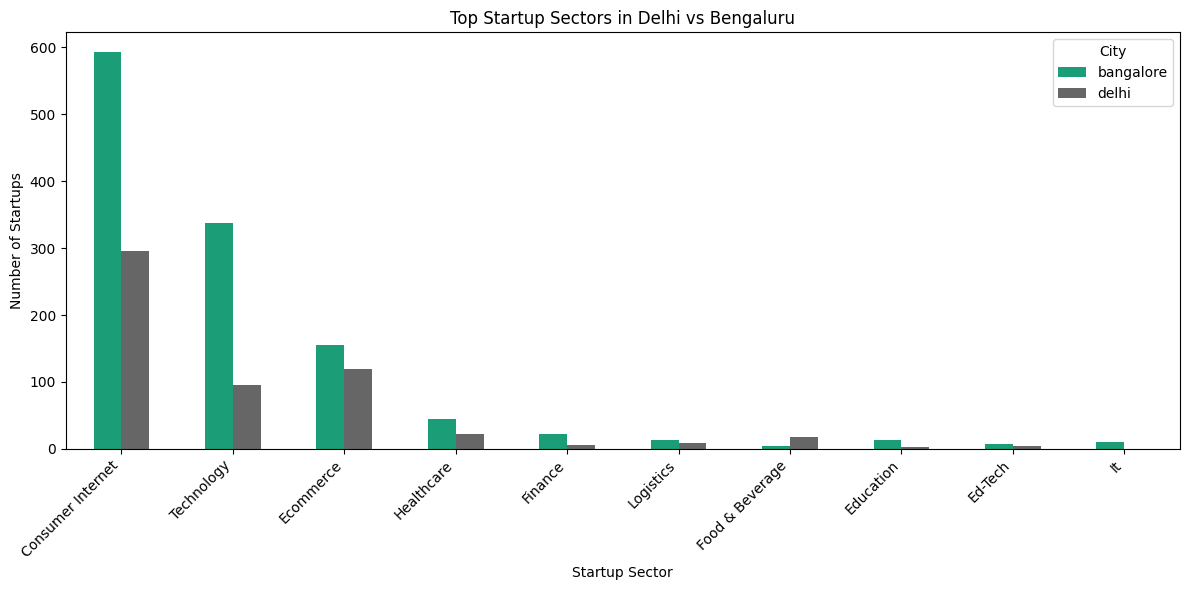

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter only Delhi and Bengaluru
df_filtered = df[df['city'].str.lower().isin(['delhi', 'bangalore'])]

# 2. Clean and group by vertical & city
df_filtered['vertical'] = df_filtered['vertical'].str.strip().str.title()
sector_counts = df_filtered.groupby(['vertical', 'city']).size().unstack().fillna(0)

# 3. Get top N categories by total count (to avoid clutter)
top_sectors = sector_counts.sum(axis=1).sort_values(ascending=False).head(10).index
sector_counts = sector_counts.loc[top_sectors]

# 4. Plot
sector_counts.plot(kind='bar', figsize=(12, 6), colormap='Dark2')
plt.title("Top Startup Sectors in Delhi vs Bengaluru")
plt.ylabel("Number of Startups")
plt.xlabel("Startup Sector")
plt.xticks(rotation=45, ha='right')
plt.legend(title="City")
plt.tight_layout()
plt.show()


C:\Users\Pandey's\AppData\Local\Temp\ipykernel_15212\2441678623.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['vertical'] = df_filtered['vertical'].str.strip().str.title()


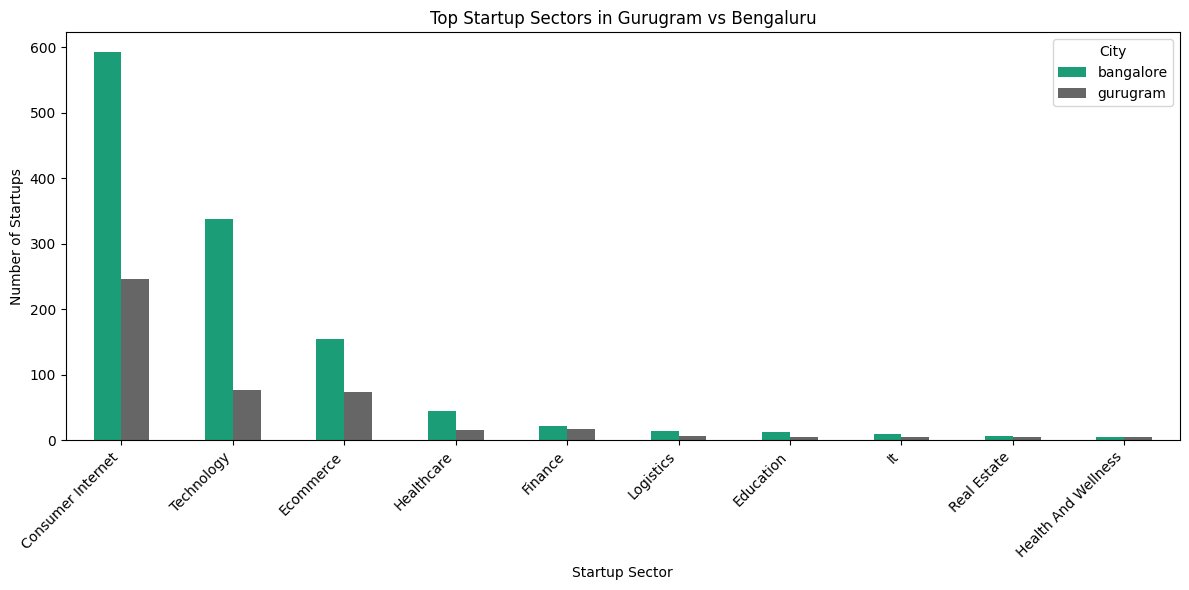

In [23]:
# Gurugram vs Banglore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter only Delhi and Bengaluru
df_filtered = df[df['city'].str.lower().isin(['gurugram', 'bangalore'])]

# 2. Clean and group by vertical & city
df_filtered['vertical'] = df_filtered['vertical'].str.strip().str.title()
sector_counts = df_filtered.groupby(['vertical', 'city']).size().unstack().fillna(0)

# 3. Get top N categories by total count (to avoid clutter)
top_sectors = sector_counts.sum(axis=1).sort_values(ascending=False).head(10).index
sector_counts = sector_counts.loc[top_sectors]

# 4. Plot
sector_counts.plot(kind='bar', figsize=(12, 6), colormap='Dark2')
plt.title("Top Startup Sectors in Gurugram vs Bengaluru")
plt.ylabel("Number of Startups")
plt.xlabel("Startup Sector")
plt.xticks(rotation=45, ha='right')
plt.legend(title="City")
plt.tight_layout()
plt.show()


C:\Users\Pandey's\AppData\Local\Temp\ipykernel_15212\3555587090.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['vertical'] = df_filtered['vertical'].str.strip().str.title()


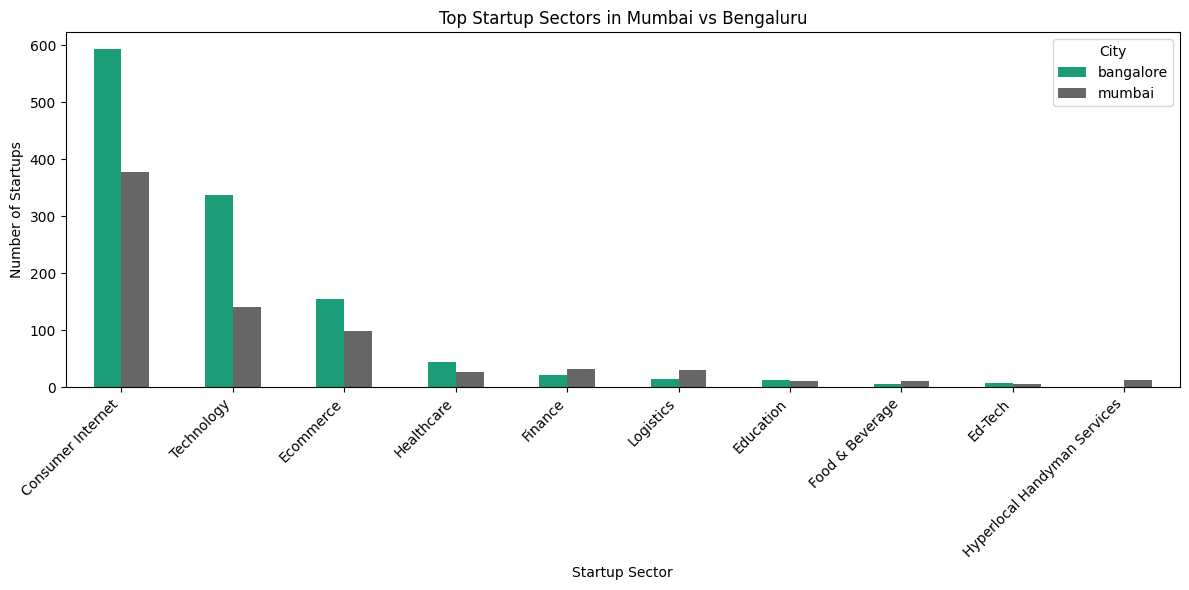

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter only Delhi and Bengaluru
df_filtered = df[df['city'].str.lower().isin(['mumbai', 'bangalore'])]

# 2. Clean and group by vertical & city
df_filtered['vertical'] = df_filtered['vertical'].str.strip().str.title()
sector_counts = df_filtered.groupby(['vertical', 'city']).size().unstack().fillna(0)

# 3. Get top N categories by total count (to avoid clutter)
top_sectors = sector_counts.sum(axis=1).sort_values(ascending=False).head(10).index
sector_counts = sector_counts.loc[top_sectors]

# 4. Plot
sector_counts.plot(kind='bar', figsize=(12, 6), colormap='Dark2')
plt.title("Top Startup Sectors in Mumbai vs Bengaluru")
plt.ylabel("Number of Startups")
plt.xlabel("Startup Sector")
plt.xticks(rotation=45, ha='right')
plt.legend(title="City")
plt.tight_layout()
plt.show()


C:\Users\Pandey's\AppData\Local\Temp\ipykernel_15212\1915153865.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['amount'] = pd.to_numeric(df_filtered['amount'], errors='coerce')
C:\Users\Pandey's\AppData\Local\Temp\ipykernel_15212\1915153865.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sector_counts = df_filtered.groupby(['fund_range', 'city']).size().unstack().fillna(0)


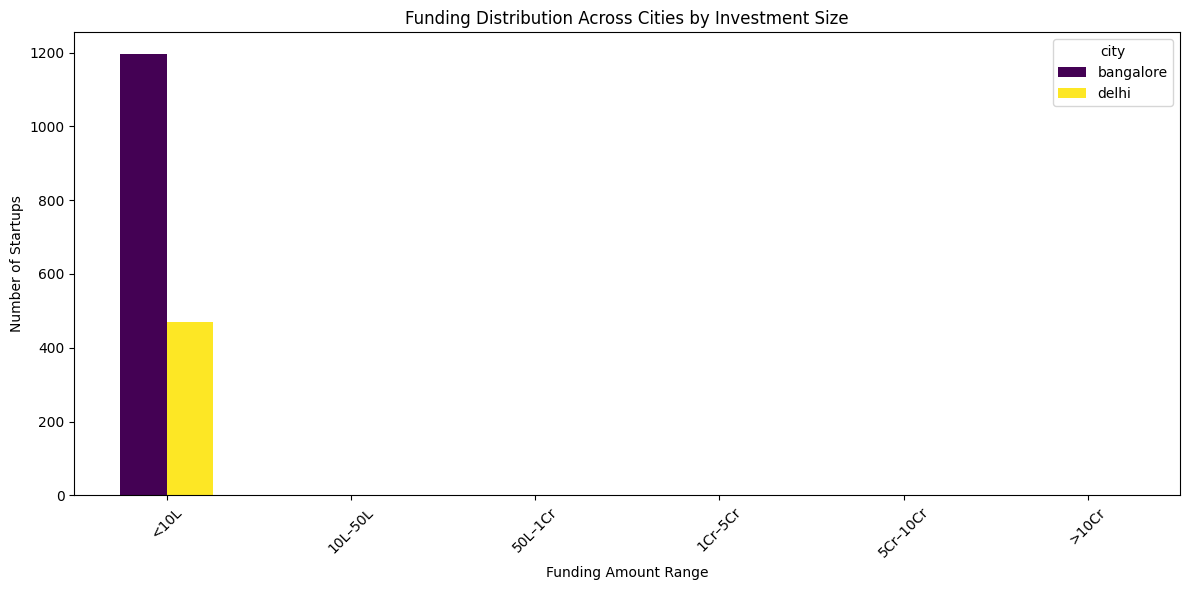

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter only Delhi and Bengaluru
df_filtered = df[df['city'].str.lower().isin(['delhi', 'bangalore'])]

# Convert amount to numeric if not already
df_filtered['amount'] = pd.to_numeric(df_filtered['amount'], errors='coerce')

# Drop any NaN values after conversion
df_filtered = df_filtered.dropna(subset=['amount'])

# Define bins for fund ranges
bins = [0, 1e6, 5e6, 1e7, 5e7, 1e8, float('inf')]
labels = ['<10L', '10L–50L', '50L–1Cr', '1Cr–5Cr', '5Cr–10Cr', '>10Cr']

# Create a new column for fund range
df_filtered['fund_range'] = pd.cut(df_filtered['amount'], bins=bins, labels=labels)


# Group by fund range and city
sector_counts = df_filtered.groupby(['fund_range', 'city']).size().unstack().fillna(0)

# Plot
sector_counts.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Funding Distribution Across Cities by Investment Size")
plt.xlabel("Funding Amount Range")
plt.ylabel("Number of Startups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Monthly Investment Trend Analysis

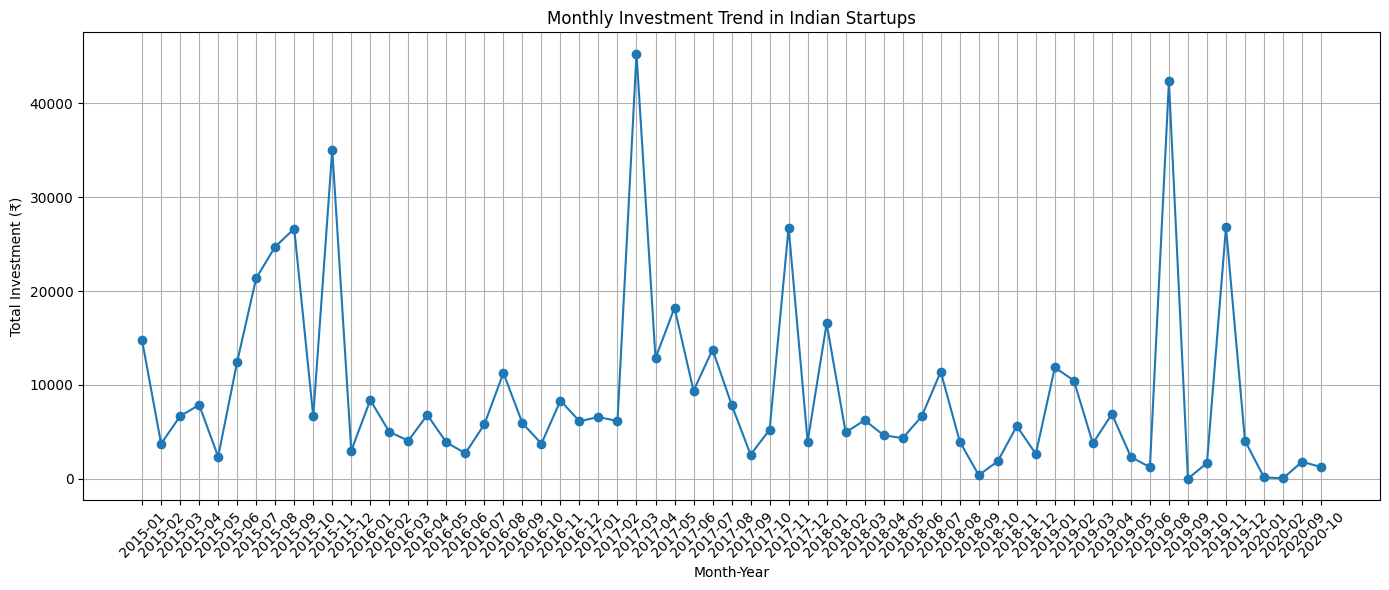

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already cleaned and 'amount' is numeric
df['date'] = pd.to_datetime(df['date'])
df['MonthYear'] = df['date'].dt.to_period('M')

# Group by Month-Year
monthly_funding = df.groupby('MonthYear')['amount'].sum().reset_index()
monthly_funding['MonthYear'] = monthly_funding['MonthYear'].astype(str)

# Plotting
plt.figure(figsize=(14,6))
plt.plot(monthly_funding['MonthYear'], monthly_funding['amount'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Investment Trend in Indian Startups')
plt.xlabel('Month-Year')
plt.ylabel('Total Investment (₹)')
plt.tight_layout()
plt.grid(True)
plt.show()


# Conclusion
We can see in the chart that investors prefer the second half of the year to add investment. There is a substantial hike in investments in months of sept-dec. 

# Predicting Investment Amount Based on Features

using XGBoost

 Mean Squared Error: 1.9519118551352333e-05
 R² Score: 0.3204858306079792


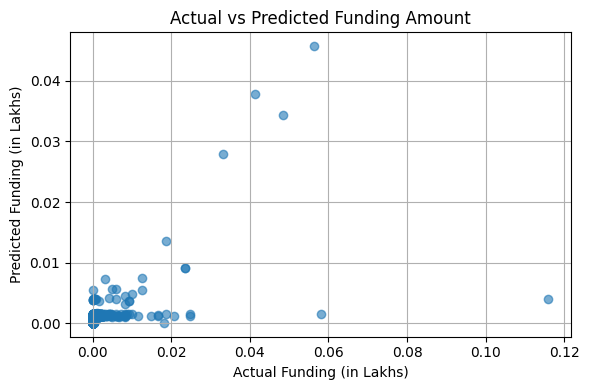

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Convert amount to numeric (in lakhs, for better scale)
df['amount'] = pd.to_numeric(df['amount'], errors='coerce') / 1e5  # Convert to lakhs

# Drop rows with missing target or critical features
df_ml = df.dropna(subset=['amount', 'city', 'vertical', 'type'])

# Encode categorical features
df_ml_encoded = pd.get_dummies(df_ml[['city', 'vertical', 'type']], drop_first=True)

# Final dataset
X = df_ml_encoded
y = df_ml['amount']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Evaluation
print(" Mean Squared Error:", mean_squared_error(y_test, y_pred))
print(" R² Score:", r2_score(y_test, y_pred))

# Visualization
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Funding (in Lakhs)")
plt.ylabel("Predicted Funding (in Lakhs)")
plt.title("Actual vs Predicted Funding Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

using random forest model

 Mean Squared Error: 2.87256405318417e-55
 R² Score: -1.8505697114257202e-05


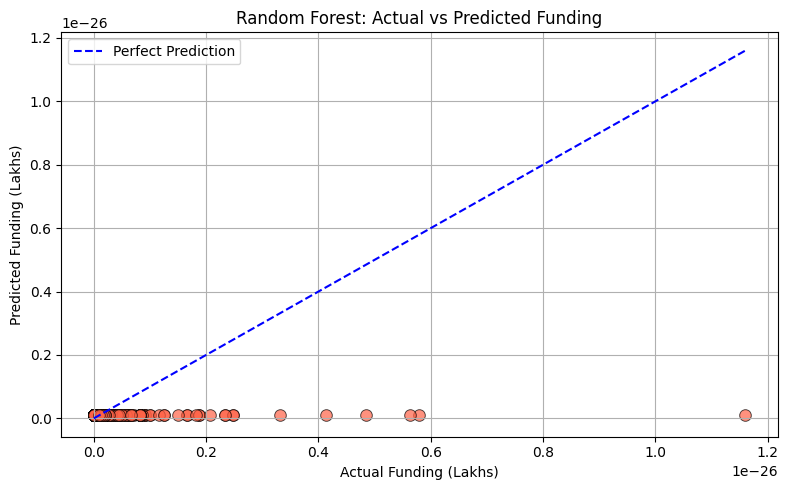

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Preprocess the dataset ---
df = df.copy()

# Clean and convert amount
df['amount'] = pd.to_numeric(df['amount'], errors='coerce') / 1e5  # Convert to Lakhs

# Drop rows with missing essential values
df_ml = df.dropna(subset=['amount', 'city', 'vertical', 'type'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_ml[['city', 'vertical', 'type']], drop_first=True)

# Features and target
X = df_encoded
y = df_ml['amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Mean Squared Error:", mse)
print(" R² Score:", r2)
plt.figure(figsize=(8, 5))

# Plot
sns.scatterplot(x=y_test, y=y_pred, color='tomato', edgecolor='k', s=70, alpha=0.7)

# Diagonal line for perfect prediction
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Perfect Prediction')

# Labels and formatting
plt.xlabel("Actual Funding (Lakhs)")
plt.ylabel("Predicted Funding (Lakhs)")
plt.title("Random Forest: Actual vs Predicted Funding")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Making a better model to assess the features

Mean Squared Error: 7.29
 R² Score: 0.1836


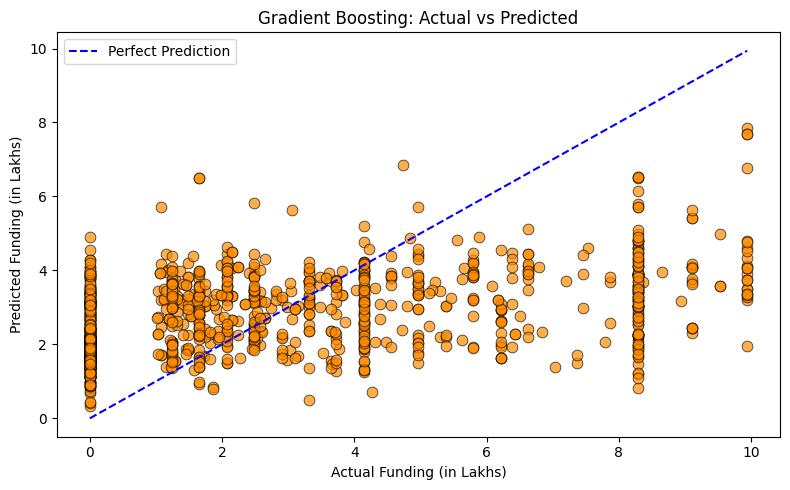

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical features
df_encoded = df.copy()

# Fill missing subvertical
df_encoded['subvertical'] = df_encoded['subvertical'].fillna('Unknown')

# Convert date
df_encoded['date'] = pd.to_datetime(df_encoded['date'])
df_encoded['year'] = df_encoded['date'].dt.year
df_encoded['month'] = df_encoded['date'].dt.month

# Label encode categorical columns

le = LabelEncoder()
for col in ['city', 'vertical', 'subvertical', 'type']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Clean and convert amount
# Ensure 'amount' is treated as string, remove commas, and extract numeric part
df_encoded['amount'] = df_encoded['amount'].astype(str) \
    .str.replace(',', '', regex=False) \
    .str.extract(r'(\d+\.?\d*)')[0] \
    .astype(float)


# Final feature set
X = df_encoded[['city', 'vertical', 'subvertical', 'type', 'year', 'month']]
y = df_encoded['amount']


# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f" R² Score: {r2:.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='darkorange', s=60, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', label='Perfect Prediction')
plt.xlabel("Actual Funding (in Lakhs)")
plt.ylabel("Predicted Funding (in Lakhs)")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()

# Final Model

Trying to make the model better by stacking models and reducing noise from data

In [36]:
# We'll pick only the most important features to reduce noise and improve accuracy
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Train a random forest to get feature importances
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selector.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.Series(rf_selector.feature_importances_, index=X_train.columns)
top_features = feature_importance.sort_values(ascending=False).head(8).index.tolist()  # Pick top 8

print("Top selected features:", top_features)

# Use selected features only
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]

Top selected features: ['subvertical', 'vertical', 'month', 'city', 'type', 'year']


In [37]:
# We’ll combine Random Forest, XGBoost, and Linear Regression using a VotingRegressor.
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Define individual models
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=150, random_state=42)
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=4, random_state=42)

# Ensemble model
ensemble_model = VotingRegressor(estimators=[
    ('lr', model_lr),
    ('rf', model_rf),
    ('xgb', model_xgb)
])

# Fit the model
ensemble_model.fit(X_train_sel, y_train)


,estimators,"[('lr', ...), ('rf', ...), ...]"
,weights,None
,n_jobs,None
,verbose,False
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
,n_estimators,150
,criterion,'squared_error'


🌟 Final Ensemble Model
Mean Squared Error: 6.1
R² Score: 0.3169


C:\Users\Pandey's\AppData\Local\Temp\ipykernel_15212\776866258.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


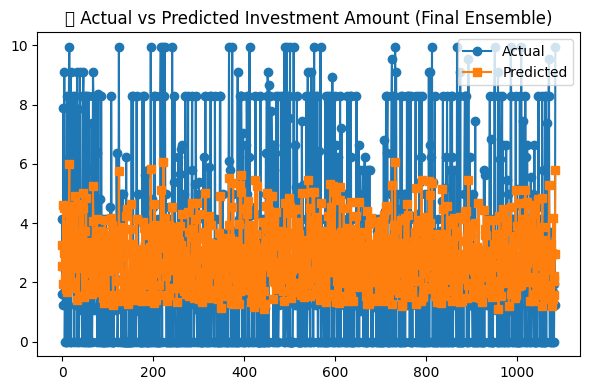

In [39]:
# Evaluation plus Visualization
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(X_test_sel)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("🌟 Final Ensemble Model")
print("Mean Squared Error:", round(mse_ensemble, 2))
print("R² Score:", round(r2_ensemble, 4))

# Compare visually
plt.figure(figsize=(6,4))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_ensemble, label="Predicted", marker='s')
plt.title("📈 Actual vs Predicted Investment Amount (Final Ensemble)")
plt.legend()
plt.tight_layout()
plt.show()
